In [1]:
import requests
import urllib3.request
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib as plt

# Finding Links

In [548]:
links_2019 = []

In [549]:
url = 'http://www.ufcstats.com/statistics/events/completed'
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')
links_arr = soup.find_all("a" , class_="b-link b-link_style_black")
    

In [550]:
for i in links_arr:
    links_2019.append(i['href'].encode('UTF8'))

In [551]:
url = 'http://www.ufcstats.com/statistics/events/completed?page=2'
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')
links_arr = soup.find_all("a" , class_="b-link b-link_style_black")

In [552]:
for i in links_arr:
    links_2019.append(i['href'].encode('UTF8'))

In [606]:
# Removing Non 2019 Fight Cards
links_2019 = links_2019[0:-7]

In [607]:
#Showing some links for example
links_2019[0:5]

['http://www.ufcstats.com/event-details/74fefd43f073cd2f',
 'http://www.ufcstats.com/event-details/4565d435005319c0',
 'http://www.ufcstats.com/event-details/b09890ba7ce1d1e2',
 'http://www.ufcstats.com/event-details/81ca2c245b19b3c5',
 'http://www.ufcstats.com/event-details/8d5daf67983b65ba']

In [600]:
def UFC_to_df(links):
    WL = []
    Fighters = []
    Opponent = []

    Strikes = []
    TakeDowns = []
    Submission = []
    Passes = []
    Weight = []
    Method = []
    MethodDescription = []
    Round = []
    Time = []
    
    
    headers = requests.utils.default_headers()
    headers.update({ 'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})
    temp_list = []
    for link in links:
        url = link
        req = requests.get(url, headers)
        soup = BeautifulSoup(req.content, 'html.parser')
        total = soup.find_all("p" , class_="b-fight-details__table-text")
        temp_list = []
        for i in total:
    
            item = i.text.encode('UTF8') ## Taking Text and converting from unicode to string
            temp_list.append(" ".join(item.split()))
        
        count = 0
        for index, i in enumerate(temp_list):
            if count < 2:
                if i == 'win':
                    WL.append('Win')
                    WL.append('Loss')
                    count += 2
                else:
                    WL.append('Draw')
                    count += 1

            elif count < 3:
                Fighters.append(i)
                Opponent.append(temp_list[index + 1])

                count += 1
            elif count < 4:
                Fighters.append(i)
                Opponent.append(temp_list[index - 1])
                count += 1
            elif count < 6:
                Strikes.append(i)
                count += 1
            elif count < 8:
                TakeDowns.append(i)
                count += 1
            elif count < 10:
                Submission.append(i)
                count += 1
            elif count < 12:
                Passes.append(i)
                count += 1
            elif count < 13:
                Weight.append(i)
                Weight.append(i)
                count += 1
            elif count < 14:
                Method.append(i)
                Method.append(i)
                count += 1
            elif count < 15:
                MethodDescription.append(i)
                MethodDescription.append(i)

                count += 1
            elif count < 16:
                Round.append(i)
                Round.append(i)
                count +=1
            elif count < 17:
                Time.append(i)
                Time.append(i)
                count = 0

    results = pd.DataFrame({'WL': WL, 
                            'Fighter': Fighters, 
                            'Opponent' : Opponent,
                            'Strikes': Strikes, 
                            'Take_Downs' : TakeDowns,
                            'Sub_Attempts' : Submission,
                            'Passes' : Passes,
                            'Weight' : Weight,
                            'Method' : Method,'Finish_Description' : MethodDescription,
                            'Round' : Round,
                            'Time' : Time
                   
                  })
    return (results)
    

### Only use if you need to scrape more data

In [601]:
# df = UFC_to_df(links_2019)
# df.to_csv('2019 Fights.csv')

In [2]:
df = pd.read_csv('2019 Fights.csv')

In [3]:
df

,Unnamed: 0,Fighter,Finish_Description,Method,Opponent,Passes,Round,Strikes,Sub_Attempts,Take_Downs,Time,WL,Weight
0,0,Chan Sung Jung,Punches,KO/TKO,Frankie Edgar,1,1,46,0,0,3:18,Win,Featherweight
1,1,Frankie Edgar,Punches,KO/TKO,Chan Sung Jung,0,1,9,0,0,3:18,Loss,Featherweight
2,2,Volkan Oezdemir,NaN,S-DEC,Aleksandar Rakic,0,3,63,0,0,5:00,Win,Light Heavyweight
3,3,Aleksandar Rakic,NaN,S-DEC,Volkan Oezdemir,0,3,75,1,1,5:00,Loss,Light Heavyweight
4,4,Charles Jourdain,Punches,KO/TKO,Dooho Choi,0,2,64,0,0,4:32,Win,Featherweight
5,5,Dooho Choi,Punches,KO/TKO,Charles Jourdain,0,2,42,0,0,4:32,Loss,Featherweight
6,6,Da-Un Jung,Punch,KO/TKO,Mike Rodriguez,0,1,5,0,0,1:04,Win,Light Heavyweight
7,7,Mike Rodriguez,Punch,KO/TKO,Da-Un Jung,0,1,4,0,0,1:04,Loss,Light Heavyweight
8,8,Junyong Park,NaN,U-DEC,Marc-Andre Barriault,0,3,77,0,5,5:00,Win,Middleweight
9,9,Marc-Andre Barriault,NaN,U-DEC,Junyong Park,0,3,51,0,0,5:00,Loss,Middleweight


### What do I really want to look at?

- Number of Minutes spent in the Octagon 
- Most efficient fighter
- Finish Breakdown. Sub group by round, weightclass

## Octagon Minutes

#### Probably a better way to do this

In [4]:
inter_round_time = []
for i in df.Time:
    inter_round_time.append(
    int(i[0]) * 60 + int(i[-2:])
    )
    
round_seconds = ((df.Round - 1) * 5 * 60) 
fight_time_seconds = inter_round_time + round_seconds
df['Fight Time (s)'] = fight_time_seconds
df['Fight Time (mins)'] = df['Fight Time (s)'] / 60

### Using the "wins" df so that values aren't counted twice

In [5]:
# Total Octagon Time:
wins = df[df.WL == 'Win']
total_sec = wins['Fight Time (s)'].sum()
total_min = wins['Fight Time (mins)'].sum() #total_sec / 60
total_hours = total_min / 60

In [6]:
print(total_sec)
print(total_min)
print(total_hours)
wins.shape

343213
5720.216666666666
95.33694444444444


(507, 15)

In [8]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [11]:
 df.to_csv('2019 Fights.csv')

In [9]:
df

,Fighter,Finish_Description,Method,Opponent,Passes,Round,Strikes,Sub_Attempts,Take_Downs,Time,WL,Weight,Fight Time (s),Fight Time (mins)
0,Chan Sung Jung,Punches,KO/TKO,Frankie Edgar,1,1,46,0,0,3:18,Win,Featherweight,198,3.300000
1,Frankie Edgar,Punches,KO/TKO,Chan Sung Jung,0,1,9,0,0,3:18,Loss,Featherweight,198,3.300000
2,Volkan Oezdemir,NaN,S-DEC,Aleksandar Rakic,0,3,63,0,0,5:00,Win,Light Heavyweight,900,15.000000
3,Aleksandar Rakic,NaN,S-DEC,Volkan Oezdemir,0,3,75,1,1,5:00,Loss,Light Heavyweight,900,15.000000
4,Charles Jourdain,Punches,KO/TKO,Dooho Choi,0,2,64,0,0,4:32,Win,Featherweight,572,9.533333
5,Dooho Choi,Punches,KO/TKO,Charles Jourdain,0,2,42,0,0,4:32,Loss,Featherweight,572,9.533333
6,Da-Un Jung,Punch,KO/TKO,Mike Rodriguez,0,1,5,0,0,1:04,Win,Light Heavyweight,64,1.066667
7,Mike Rodriguez,Punch,KO/TKO,Da-Un Jung,0,1,4,0,0,1:04,Loss,Light Heavyweight,64,1.066667
8,Junyong Park,NaN,U-DEC,Marc-Andre Barriault,0,3,77,0,5,5:00,Win,Middleweight,900,15.000000
9,Marc-Andre Barriault,NaN,U-DEC,Junyong Park,0,3,51,0,0,5:00,Loss,Middleweight,900,15.000000


## Finish Breakdowns

In [709]:
print('test')

test


In [730]:
# wins.groupby('Weight').count().order()

AttributeError: 'DataFrame' object has no attribute 'order'

In [740]:
# weight_brkdwn = wins.groupby('Weight').count().sort_values('Method', Descending = True)

TypeError: sort_values() got an unexpected keyword argument 'Descending'

In [733]:
weight_brkdwn

,Unnamed: 0,Fighter,Finish_Description,Method,Opponent,Passes,Round,Strikes,Sub_Attempts,Take_Downs,Time,WL,Fight Time (s),Fight Time (mins)
Weight,,,,,,,,,,,,,,
Catch Weight,1,1,0,1,1,1,1,1,1,1,1,1,1,1
Women's Featherweight,3,3,2,3,3,3,3,3,3,3,3,3,3,3
Flyweight,16,16,6,16,16,16,16,16,16,16,16,16,16,16
Women's Bantamweight,23,23,10,23,23,23,23,23,23,23,23,23,23,23
Women's Strawweight,29,29,8,29,29,29,29,29,29,29,29,29,29,29
Women's Flyweight,36,36,11,36,36,36,36,36,36,36,36,36,36,36
Heavyweight,38,38,25,38,38,38,38,38,38,38,38,38,38,38
Light Heavyweight,44,44,30,44,44,44,44,44,44,44,44,44,44,44
Middleweight,46,46,17,46,46,46,46,46,46,46,46,46,46,46


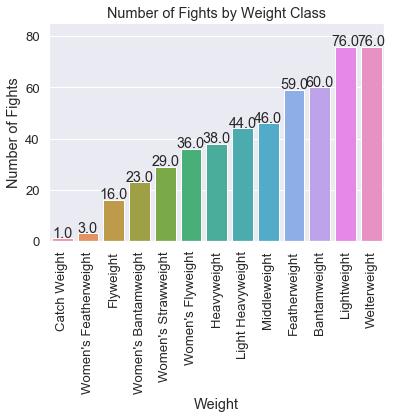

In [739]:
fig, ax1 = plt.figsize=(20,20)
graph = sns.barplot(x=weight_brkdwn.index, y= weight_brkdwn.Method,)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
graph.set_title('Number of Fights by Weight Class')
graph.set(ylabel = 'Number of Fights')
graph.set(ylim=(0, 85))
sns.set(font_scale=1.2)
for p in graph.patches:
    height = p.get_height() 
    graph.text(p.get_x()+p.get_width()/2., height + 0.5,height ,ha="center")

In [705]:
with sns.axes_style('dark'):
    ax = sns.barplot(x="Weight", y="Method", data=weight_brkdwn )
    
#     g = sns.factorplot("year", data=planets, aspect=2,
#                        kind="count", color='steelblue')
#     g.set_xticklabels(step=5)

NameError: name 'weight_brkdwn' is not defined

### Exporting Every second Value since we have redundencies

In [17]:
evens = df[0::2]

In [13]:
# win_only = df[df.WL == 'Win']

In [18]:
evens.to_csv('evens.csv')

In [21]:
evens.WL.unique()

array(['Win', 'Draw'], dtype=object)

In [23]:
evens.groupby('Weight').count()

,Fighter,Finish_Description,Method,Opponent,Passes,Round,Strikes,Sub_Attempts,Take_Downs,Time,WL,Fight Time (s),Fight Time (mins)
Weight,,,,,,,,,,,,,
Bantamweight,61,25,61,61,61,61,61,61,61,61,61,61,61
Catch Weight,1,0,1,1,1,1,1,1,1,1,1,1,1
Featherweight,61,27,61,61,61,61,61,61,61,61,61,61,61
Flyweight,17,6,17,17,17,17,17,17,17,17,17,17,17
Heavyweight,40,25,40,40,40,40,40,40,40,40,40,40,40
Light Heavyweight,46,30,46,46,46,46,46,46,46,46,46,46,46
Lightweight,76,33,76,76,76,76,76,76,76,76,76,76,76
Middleweight,46,17,46,46,46,46,46,46,46,46,46,46,46
Welterweight,76,36,76,76,76,76,76,76,76,76,76,76,76


In [33]:
evens.groupby(['Method','Finish_Description']).count()

Fighter  Opponent  Passes  Round  Strikes  \
Method Finish_Description                                              
KO/TKO Elbow                     2         2       2      2        2   
       Elbows                    9         9       9      9        9   
       Flying Knee               3         3       3      3        3   
       Kick                     16        16      16     16       16   
       Knee                      5         5       5      5        5   
       Knees                     1         1       1      1        1   
       Punch                    68        68      68     68       68   
       Punches                  40        40      40     40       40   
       Slam                      1         1       1      1        1   
       Spinning Back Fist        2         2       2      2        2   
       Spinning Back Kick        2         2       2      2        2   
SUB    Anaconda Choke            4         4       4      4        4   
       Arm Triangle              8         8       8      8        8   
       Armbar                    9         9       9      9        9   
       Guillotine Choke         10        10      10     10       10   
       Heel Hook                 1         1       1      1        1   
       Kimura                    1         1       1      1        1   
       Neck Crank                1         1       1      1        1   
       Other                     1         1       1      1        1   
       Other - Choke             3         3       3      3        3   
       Peruvian Necktie          1         1       1      1        1   
       Rear Naked Choke         35        35      35     35       35   
       Triangle Choke            7         7       7      7        7   

                           Sub_Attempts  Take_Downs  Time  WL  Weight  \
Method Finish_Description                                               
KO/TKO Elbow                          2           2     2   2       2   
       Elbows                         9           9     9   9       9   
       Flying Knee                    3           3     3   3       3   
       Kick                          16          16    16  16      16   
       Knee                           5           5     5   5       5   
       Knees                          1           1     1   1       1   
       Punch                         68          68    68  68      68   
       Punches                       40          40    40  40      40   
       Slam                           1           1     1   1       1   
       Spinning Back Fist             2           2     2   2       2   
       Spinning Back Kick             2           2     2   2       2   
SUB    Anaconda Choke                 4           4     4   4       4   
       Arm Triangle                   8           8     8   8       8   
       Armbar                         9           9     9   9       9   
       Guillotine Choke              10          10    10  10      10   
       Heel Hook                      1           1     1   1       1   
       Kimura                         1           1     1   1       1   
       Neck Crank                     1           1     1   1       1   
       Other                          1           1     1   1       1   
       Other - Choke                  3           3     3   3       3   
       Peruvian Necktie               1           1     1   1       1   
       Rear Naked Choke              35          35    35  35      35   
       Triangle Choke                 7           7     7   7       7   

                           Fight Time (s)  Fight Time (mins)  
Method Finish_Description                                     
KO/TKO Elbow                            2                  2  
       Elbows                           9                  9  
       Flying Knee                      3                  3  
       Kick                            16                 16  
       Knee           

In [34]:
df.Strikes.describe()

count    1032.000000
mean       42.496124
std        34.153303
min         0.000000
25%        17.000000
50%        34.000000
75%        61.000000
max       181.000000
Name: Strikes, dtype: float64

# I want to combine fight totals:  Submission Attempts, Take Downs, and Strikes from each fight will be represented

In [49]:
df.tail()

,Fighter,Finish_Description,Method,Opponent,Passes,Round,Strikes,Sub_Attempts,Take_Downs,Time,WL,Weight,Fight Time (s),Fight Time (mins)
1027,Te Edwards,NaN,U-DEC,Dennis Bermudez,0,3,23,0,0,5:00,Loss,Lightweight,900,15.000000
1028,Geoff Neal,NaN,U-DEC,Belal Muhammad,0,3,71,0,0,5:00,Win,Welterweight,900,15.000000
1029,Belal Muhammad,NaN,U-DEC,Geoff Neal,0,3,63,0,0,5:00,Loss,Welterweight,900,15.000000
1030,Chance Rencountre,Rear Naked Choke,SUB,Kyle Stewart,1,1,6,1,2,2:25,Win,Welterweight,145,2.416667
1031,Kyle Stewart,Rear Naked Choke,SUB,Chance Rencountre,0,1,2,0,0,2:25,Loss,Welterweight,145,2.416667


In [46]:
sub_comb = []
td_comb = []
strikes_comb = []
for i in range(0,len(df),2):
    sub_result = df.Sub_Attempts[i] + df.Sub_Attempts[i + 1]
    sub_comb.append(sub_result)
    
    td_result = df.Take_Downs[i] + df.Take_Downs[i + 1]
    td_comb.append(td_result)
    
    strikes_result = df.Strikes[i] + df.Strikes[i + 1]
    strikes_comb.append(strikes_result)
    

combined_results = pd.DataFrame({'Submission_Attempts' : sub_comb,
                                'TakeDowns' : td_comb,
                                'Strikes' : strikes_comb})



In [51]:
combined_results.to_csv('combined_results.csv')

In [39]:
arr_test = [1,2,3,4,5,6,7,8,9,10]
again = []
for i in range(0,len(arr_test),2):
    result = 




0
2
4
6
8


In [52]:
df[df.Strikes > 150]

,Fighter,Finish_Description,Method,Opponent,Passes,Round,Strikes,Sub_Attempts,Take_Downs,Time,WL,Weight,Fight Time (s),Fight Time (mins)
26,Kamaru Usman,Punch,KO/TKO,Colby Covington,0,5,175,0,0,4:10,Win,Welterweight,1450,24.166667
28,Alexander Volkanovski,NaN,U-DEC,Max Holloway,0,5,157,0,0,5:00,Win,Featherweight,1500,25.000000
198,Joanna Jedrzejczyk,NaN,U-DEC,Michelle Waterson,0,5,180,1,3,5:00,Win,Women's Strawweight,1500,25.000000
368,Karol Rosa,NaN,S-DEC,Lara Procopio,0,3,171,0,0,5:00,Win,Women's Bantamweight,900,15.000000
369,Lara Procopio,NaN,S-DEC,Karol Rosa,0,3,165,0,0,5:00,Loss,Women's Bantamweight,900,15.000000
371,Daniel Cormier,Punches,KO/TKO,Stipe Miocic,2,4,181,0,1,4:09,Loss,Heavyweight,1149,19.150000
420,Colby Covington,NaN,U-DEC,Robbie Lawler,0,5,179,0,10,5:00,Win,Welterweight,1500,25.000000
476,Andrei Arlovski,NaN,U-DEC,Ben Rothwell,0,3,152,0,0,5:00,Win,Heavyweight,900,15.000000
584,Deron Winn,NaN,U-DEC,Eric Spicely,0,3,169,0,0,5:00,Win,Middleweight,900,15.000000
598,Aljamain Sterling,NaN,U-DEC,Pedro Munhoz,0,3,174,0,0,5:00,Win,Bantamweight,900,15.000000


In [53]:
evens

,Fighter,Finish_Description,Method,Opponent,Passes,Round,Strikes,Sub_Attempts,Take_Downs,Time,WL,Weight,Fight Time (s),Fight Time (mins)
0,Chan Sung Jung,Punches,KO/TKO,Frankie Edgar,1,1,46,0,0,3:18,Win,Featherweight,198,3.300000
2,Volkan Oezdemir,NaN,S-DEC,Aleksandar Rakic,0,3,63,0,0,5:00,Win,Light Heavyweight,900,15.000000
4,Charles Jourdain,Punches,KO/TKO,Dooho Choi,0,2,64,0,0,4:32,Win,Featherweight,572,9.533333
6,Da-Un Jung,Punch,KO/TKO,Mike Rodriguez,0,1,5,0,0,1:04,Win,Light Heavyweight,64,1.066667
8,Junyong Park,NaN,U-DEC,Marc-Andre Barriault,0,3,77,0,5,5:00,Win,Middleweight,900,15.000000
10,Kyung Ho Kang,NaN,S-DEC,Liu Pingyuan,2,3,20,0,3,5:00,Win,Bantamweight,900,15.000000
12,Ciryl Gane,NaN,U-DEC,Tanner Boser,0,3,65,0,0,5:00,Win,Heavyweight,900,15.000000
14,SeungWoo Choi,NaN,U-DEC,Suman Mokhtarian,2,3,95,0,0,5:00,Win,Featherweight,900,15.000000
16,Omar Morales,NaN,U-DEC,Dong Hyun Ma,3,3,32,0,1,5:00,Win,Lightweight,900,15.000000
18,Alexandre Pantoja,Punch,KO/TKO,Matt Schnell,1,1,34,0,1,4:17,Win,Flyweight,257,4.283333
